# Birds_Recognization

### Owl -vs- Sparrow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [2]:
#Creating Directory path

DATA_DIR=r"C:\Users\Admin\Downloads\Kaggle Datasets\Birds_Dataset\dataset1.0\test"

In [3]:
#Categorizing the data

categories=['Owl','Sparrow']

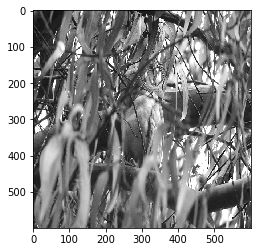

In [4]:
for category in categories:
    path=os.path.join(DATA_DIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        
        break
    break

In [5]:
img_array.shape

(600, 600)

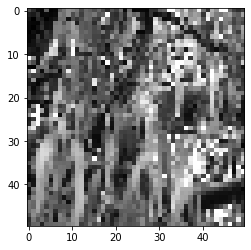

In [6]:
#Resizing image
img_size=50

new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [7]:
new_array.shape

(50, 50)

## Create Training data

In [8]:
training_data=[]

def create_training_data():
    for category in categories:
        path=os.path.join(DATA_DIR,category)
        class_num=categories.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()
            
print(len(training_data))            

100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:02<00:00, 46.73it/s]


240


In [9]:
#shuffle the training data
import random
random.shuffle(training_data)
for sample in training_data:
    print(sample[1])

0
1
0
1
0
1
1
0
0
0
1
0
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
1
1
0
0
0
0
0
0
1
1
0
0
1
1
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
1
1
1
1
1
1
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
1
1
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
0
0
0
0
1
0
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
0
1
0
0
1
0
0
1
1
1
1
1
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
0
1
1
0
0
0
1
0
1
0
0
1
1
0
0
1
0
1
1
0
1
0
1
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
0
1
1


In [10]:
a=[]
b=[]

for features,label in training_data:
    a.append(features)     #Assign features 
    b.append(label)        #Assign label
    
print(a[0].reshape(-1,img_size,img_size,1))

[[[[253]
   [253]
   [253]
   ...
   [254]
   [253]
   [253]]

  [[140]
   [ 86]
   [ 84]
   ...
   [ 92]
   [ 92]
   [ 38]]

  [[139]
   [ 85]
   [ 82]
   ...
   [ 92]
   [ 92]
   [ 37]]

  ...

  [[140]
   [ 84]
   [ 81]
   ...
   [ 52]
   [ 50]
   [ 19]]

  [[137]
   [ 77]
   [ 80]
   ...
   [ 52]
   [ 60]
   [ 15]]

  [[228]
   [ 97]
   [ 97]
   ...
   [ 97]
   [ 98]
   [ 96]]]]


In [11]:
a=np.array(a).reshape(-1,img_size,img_size,1)

## Writing the files

In [12]:
import pickle

pickle_out=open('a.pickle','wb')
pickle.dump(a,pickle_out)
pickle_out.close()


pickle_out=open('b.pickle','wb')
pickle.dump(b,pickle_out)
pickle_out.close()

In [13]:
#load Data

pickle_in=open('a.pickle','rb')
a=pickle.load(pickle_in)
a

array([[[[253],
         [253],
         [253],
         ...,
         [254],
         [253],
         [253]],

        [[140],
         [ 86],
         [ 84],
         ...,
         [ 92],
         [ 92],
         [ 38]],

        [[139],
         [ 85],
         [ 82],
         ...,
         [ 92],
         [ 92],
         [ 37]],

        ...,

        [[140],
         [ 84],
         [ 81],
         ...,
         [ 52],
         [ 50],
         [ 19]],

        [[137],
         [ 77],
         [ 80],
         ...,
         [ 52],
         [ 60],
         [ 15]],

        [[228],
         [ 97],
         [ 97],
         ...,
         [ 97],
         [ 98],
         [ 96]]],


       [[[ 46],
         [121],
         [ 81],
         ...,
         [103],
         [154],
         [169]],

        [[130],
         [ 44],
         [105],
         ...,
         [ 84],
         [ 67],
         [113]],

        [[ 71],
         [176],
         [121],
         ...,
         [ 40],
         [

In [14]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

## Reading the files

In [15]:
pickle_in = open("a.pickle",'rb')   
a = pickle.load(pickle_in)

pickle_in = open("b.pickle",'rb')
b = pickle.load(pickle_in)

In [16]:
a.shape

(240, 50, 50, 1)

In [17]:
model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=a.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # this converts our 3D features map to 1D feature vector

model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(a,b, batch_size=32, epochs=3,validation_split=0.3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 168 samples, validate on 72 samples
Epoch 1/3
168/168 [==============================] - ETA: 7s - loss: 1.3692 - acc: 0.593 - ETA: 4s - loss: 533.4060 - acc: 0.546 - ETA: 3s - loss: 418.5242 - acc: 0.552 - ETA: 1s - loss: 342.5107 - acc: 0.539 - ETA: 0s - loss: 287.1255 - acc: 0.531 - 8s 46ms/sample - loss: 273.6909 - acc: 0.5417 - val_loss: 37.0520 - val_acc: 0.5278
Epoch 2/3
168/168 [==============================] - ETA: 5s - loss: 42.6561 - acc: 0.46 - ETA: 3s - loss: 40.7936 - acc: 0.42 - ETA: 2s - loss: 30.6097 - acc: 0.47 - ETA: 1s - loss: 23.6373 - acc: 0.48 - ETA: 0s - loss: 19.2816 - acc: 0.48 - 7s 42ms/sample - loss: 18.3966 - acc: 0.4940 - val_loss: 0.6868 - val_acc: 0.5694
Epoch 3/3
168/168 [==============================] - ETA: 4s - loss: 0.5813 - acc: 0.656 - ETA: 3s - loss: 0.7001 - acc:

In [18]:
NAME = "Owl-vs-Sparrow-CNN"

tensorboard = TensorBoard(log_dir="logs\{}".format(NAME))

a = a/255.0

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=a.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),input_shape=a.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # this converts our 3D features map to 1D feature vector

model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(a,b, batch_size=32, epochs=3,validation_split=0.3,callbacks=[tensorboard])

Train on 168 samples, validate on 72 samples
Epoch 1/3
168/168 [==============================] - ETA: 5s - loss: 0.6917 - acc: 0.562 - ETA: 4s - loss: 2.0141 - acc: 0.562 - ETA: 2s - loss: 1.6251 - acc: 0.500 - ETA: 1s - loss: 1.4644 - acc: 0.500 - ETA: 0s - loss: 1.3314 - acc: 0.487 - 7s 44ms/sample - loss: 1.2959 - acc: 0.5119 - val_loss: 0.7013 - val_acc: 0.4722
Epoch 2/3
168/168 [==============================] - ETA: 5s - loss: 0.6968 - acc: 0.500 - ETA: 3s - loss: 0.6980 - acc: 0.484 - ETA: 2s - loss: 0.6990 - acc: 0.458 - ETA: 1s - loss: 0.6974 - acc: 0.476 - ETA: 0s - loss: 0.6953 - acc: 0.506 - 7s 43ms/sample - loss: 0.6953 - acc: 0.5060 - val_loss: 0.6931 - val_acc: 0.4722
Epoch 3/3
168/168 [==============================] - ETA: 5s - loss: 0.6956 - acc: 0.437 - ETA: 3s - loss: 0.6937 - acc: 0.515 - ETA: 2s - loss: 0.6917 - acc: 0.583 - ETA: 1s - loss: 0.6903 - acc: 0.601 - ETA: 0s - loss: 0.6898 - acc: 0.618 - 7s 42ms/sample - loss: 0.6914 - acc: 0.6012 - val_loss: 0.6870 -

In [19]:
NAME = "Owl-vs-Sparrow-CNN-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir="logs\{}".format(NAME))

a = a/255.0

model=Sequential()

model.add(Conv2D(256,(3,3),input_shape=a.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),input_shape=a.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # this converts our 3D features map to 1D feature vector

model.add(Dense(64))
model.add(Activation('relu'))


model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(a,b, batch_size=32, epochs=3,validation_split=0.3,callbacks=[tensorboard])

Train on 168 samples, validate on 72 samples
Epoch 1/3
168/168 [==============================] - ETA: 5s - loss: 0.6932 - acc: 0.343 - ETA: 4s - loss: 0.6941 - acc: 0.390 - ETA: 2s - loss: 0.6938 - acc: 0.427 - ETA: 1s - loss: 0.6934 - acc: 0.476 - ETA: 0s - loss: 0.6932 - acc: 0.487 - 8s 45ms/sample - loss: 0.6932 - acc: 0.4881 - val_loss: 0.6964 - val_acc: 0.4722
Epoch 2/3
168/168 [==============================] - ETA: 5s - loss: 0.7046 - acc: 0.375 - ETA: 3s - loss: 0.6949 - acc: 0.515 - ETA: 2s - loss: 0.6944 - acc: 0.510 - ETA: 1s - loss: 0.6946 - acc: 0.500 - ETA: 0s - loss: 0.6938 - acc: 0.512 - 7s 42ms/sample - loss: 0.6938 - acc: 0.5119 - val_loss: 0.6947 - val_acc: 0.4722
Epoch 3/3
168/168 [==============================] - ETA: 5s - loss: 0.7006 - acc: 0.343 - ETA: 3s - loss: 0.6975 - acc: 0.406 - ETA: 2s - loss: 0.6963 - acc: 0.427 - ETA: 1s - loss: 0.6957 - acc: 0.437 - ETA: 0s - loss: 0.6947 - acc: 0.493 - 7s 43ms/sample - loss: 0.6945 - acc: 0.5119 - val_loss: 0.6935 -

``For getting better output use:``

                               1.Use conv2D with 64 instead of 256
                               
                               2.And remove dense 64

In [20]:
NAME = "Owl-vs-Sparrow-CNN-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir="logs\{}".format(NAME))

a = a/255.0

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=a.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=a.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # this converts our 3D features map to 1D feature vector


model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(a,b, batch_size=32, epochs=3,validation_split=0.3,callbacks=[tensorboard])

Train on 168 samples, validate on 72 samples
Epoch 1/3
168/168 [==============================] - ETA: 1s - loss: 0.6931 - acc: 0.593 - ETA: 1s - loss: 0.6931 - acc: 0.546 - ETA: 0s - loss: 0.6932 - acc: 0.520 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6933 - acc: 0.487 - 2s 10ms/sample - loss: 0.6934 - acc: 0.4762 - val_loss: 0.6932 - val_acc: 0.4722
Epoch 2/3
168/168 [==============================] - ETA: 0s - loss: 0.6927 - acc: 0.656 - ETA: 0s - loss: 0.6929 - acc: 0.593 - ETA: 0s - loss: 0.6929 - acc: 0.593 - ETA: 0s - loss: 0.6929 - acc: 0.570 - ETA: 0s - loss: 0.6932 - acc: 0.525 - 1s 7ms/sample - loss: 0.6932 - acc: 0.5119 - val_loss: 0.6932 - val_acc: 0.4722
Epoch 3/3
168/168 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.531 - ETA: 0s - loss: 0.6930 - acc: 0.562 - ETA: 0s - loss: 0.6931 - acc: 0.510 - ETA: 0s - loss: 0.6931 - acc: 0.484 - ETA: 0s - loss: 0.6931 - acc: 0.456 - 1s 7ms/sample - loss: 0.6931 - acc: 0.4643 - val_loss: 0.6931 - v

In [21]:
NAME = "Owl-vs-Sparrow-CNN-{}".format(int(time.time()))

# GPU Confriguation
# gpu_option = tf.GPUOptions(per_process_gpu_memory_fraction=0.33)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_option))

a = a/255.0

# looping the model with random numbers

dense_layers = [0,1,2]          
layer_sizes = [32,64,128]
conv_layers = [1,2,3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}--Conv--{}--nodes--{}--dense--{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
            print(NAME)

            model=Sequential()

            model.add(Conv2D(layer_size,(3,3),input_shape=a.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size,(3,3),input_shape=a.shape[1:]))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten()) # this converts our 3D features map to 1D feature vector
            
            for _ in range(dense_layer):
                model.add(Dense(64))
                model.add(Activation('relu'))

            tensorboard = TensorBoard(log_dir="logs\{}".format(NAME))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))


            model.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

            model.fit(a,b, batch_size=32, epochs=15,validation_split=0.3,callbacks=[tensorboard])

1--Conv--32--nodes--0--dense--1594364124
Train on 168 samples, validate on 72 samples
Epoch 1/15
168/168 [==============================] - ETA: 1s - loss: 0.6931 - acc: 0.500 - ETA: 0s - loss: 0.6931 - acc: 0.515 - ETA: 0s - loss: 0.6928 - acc: 0.552 - ETA: 0s - loss: 0.6929 - acc: 0.539 - ETA: 0s - loss: 0.6930 - acc: 0.531 - 1s 5ms/sample - loss: 0.6939 - acc: 0.5119 - val_loss: 0.6942 - val_acc: 0.4722
Epoch 2/15
168/168 [==============================] - ETA: 0s - loss: 0.6943 - acc: 0.468 - ETA: 0s - loss: 0.6928 - acc: 0.531 - ETA: 0s - loss: 0.6929 - acc: 0.520 - ETA: 0s - loss: 0.6929 - acc: 0.523 - ETA: 0s - loss: 0.6930 - acc: 0.512 - 0s 3ms/sample - loss: 0.6930 - acc: 0.5119 - val_loss: 0.6932 - val_acc: 0.4722
Epoch 3/15
168/168 [==============================] - ETA: 0s - loss: 0.6929 - acc: 0.562 - ETA: 0s - loss: 0.6929 - acc: 0.593 - ETA: 0s - loss: 0.6930 - acc: 0.572 - ETA: 0s - loss: 0.6931 - acc: 0.506 - 0s 2ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.693

168/168 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.468 - ETA: 0s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6932 - acc: 0.489 - ETA: 0s - loss: 0.6932 - acc: 0.492 - ETA: 0s - loss: 0.6932 - acc: 0.500 - 1s 3ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6933 - val_acc: 0.4722
Epoch 12/15
168/168 [==============================] - ETA: 0s - loss: 0.6923 - acc: 0.687 - ETA: 0s - loss: 0.6929 - acc: 0.562 - ETA: 0s - loss: 0.6930 - acc: 0.541 - ETA: 0s - loss: 0.6931 - acc: 0.523 - ETA: 0s - loss: 0.6932 - acc: 0.506 - 1s 4ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6934 - val_acc: 0.4722
Epoch 13/15
168/168 [==============================] - ETA: 0s - loss: 0.6940 - acc: 0.375 - ETA: 0s - loss: 0.6933 - acc: 0.484 - ETA: 0s - loss: 0.6928 - acc: 0.541 - ETA: 0s - loss: 0.6929 - acc: 0.539 - ETA: 0s - loss: 0.6930 - acc: 0.525 - 1s 4ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6934 - val_acc: 0.4722
Epoch 14/15
168/168 [================

Epoch 6/15
168/168 [==============================] - ETA: 0s - loss: 0.6898 - acc: 0.656 - ETA: 0s - loss: 0.6920 - acc: 0.562 - ETA: 0s - loss: 0.6928 - acc: 0.531 - ETA: 0s - loss: 0.6944 - acc: 0.484 - ETA: 0s - loss: 0.6935 - acc: 0.506 - 1s 4ms/sample - loss: 0.6933 - acc: 0.5119 - val_loss: 0.6944 - val_acc: 0.4722
Epoch 7/15
168/168 [==============================] - ETA: 0s - loss: 0.6898 - acc: 0.593 - ETA: 0s - loss: 0.6937 - acc: 0.500 - ETA: 0s - loss: 0.6922 - acc: 0.531 - ETA: 0s - loss: 0.6946 - acc: 0.484 - ETA: 0s - loss: 0.6931 - acc: 0.512 - 1s 4ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6950 - val_acc: 0.4722
Epoch 8/15
168/168 [==============================] - ETA: 0s - loss: 0.6902 - acc: 0.562 - ETA: 0s - loss: 0.6901 - acc: 0.562 - ETA: 0s - loss: 0.6919 - acc: 0.531 - ETA: 0s - loss: 0.6919 - acc: 0.531 - ETA: 0s - loss: 0.6927 - acc: 0.518 - 1s 4ms/sample - loss: 0.6932 - acc: 0.5119 - val_loss: 0.6953 - val_acc: 0.4722
Epoch 9/15
168/168 [========

3--Conv--64--nodes--0--dense--1594364193
Train on 168 samples, validate on 72 samples
Epoch 1/15
168/168 [==============================] - ETA: 2s - loss: 0.6931 - acc: 0.500 - ETA: 1s - loss: 0.6932 - acc: 0.468 - ETA: 0s - loss: 0.6933 - acc: 0.447 - ETA: 0s - loss: 0.6933 - acc: 0.468 - ETA: 0s - loss: 0.6932 - acc: 0.481 - 2s 11ms/sample - loss: 0.6932 - acc: 0.4881 - val_loss: 0.6933 - val_acc: 0.4722
Epoch 2/15
168/168 [==============================] - ETA: 0s - loss: 0.6928 - acc: 0.562 - ETA: 0s - loss: 0.6925 - acc: 0.578 - ETA: 0s - loss: 0.6925 - acc: 0.562 - ETA: 0s - loss: 0.6925 - acc: 0.554 - ETA: 0s - loss: 0.6935 - acc: 0.518 - 1s 7ms/sample - loss: 0.6937 - acc: 0.5119 - val_loss: 0.6940 - val_acc: 0.4722
Epoch 3/15
168/168 [==============================] - ETA: 0s - loss: 0.6916 - acc: 0.562 - ETA: 0s - loss: 0.6924 - acc: 0.531 - ETA: 0s - loss: 0.6934 - acc: 0.489 - ETA: 0s - loss: 0.6933 - acc: 0.492 - ETA: 0s - loss: 0.6930 - acc: 0.512 - 1s 7ms/sample - loss:

168/168 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.375 - ETA: 0s - loss: 0.6932 - acc: 0.468 - ETA: 0s - loss: 0.6931 - acc: 0.520 - ETA: 0s - loss: 0.6931 - acc: 0.523 - ETA: 0s - loss: 0.6931 - acc: 0.512 - 1s 5ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6932 - val_acc: 0.4722
Epoch 11/15
168/168 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.406 - ETA: 0s - loss: 0.6932 - acc: 0.484 - ETA: 0s - loss: 0.6931 - acc: 0.562 - ETA: 0s - loss: 0.6931 - acc: 0.515 - ETA: 0s - loss: 0.6932 - acc: 0.500 - 1s 5ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6932 - val_acc: 0.4722
Epoch 12/15
168/168 [==============================] - ETA: 0s - loss: 0.6930 - acc: 0.562 - ETA: 0s - loss: 0.6931 - acc: 0.515 - ETA: 0s - loss: 0.6931 - acc: 0.510 - ETA: 0s - loss: 0.6931 - acc: 0.523 - ETA: 0s - loss: 0.6931 - acc: 0.525 - 1s 6ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6932 - val_acc: 0.4722
Epoch 13/15
168/168 [================

168/168 [==============================] - ETA: 1s - loss: 0.6944 - acc: 0.468 - ETA: 1s - loss: 0.6939 - acc: 0.484 - ETA: 0s - loss: 0.6941 - acc: 0.479 - ETA: 0s - loss: 0.6930 - acc: 0.507 - ETA: 0s - loss: 0.6936 - acc: 0.493 - 3s 16ms/sample - loss: 0.6928 - acc: 0.5119 - val_loss: 0.6951 - val_acc: 0.4722
Epoch 5/15
168/168 [==============================] - ETA: 1s - loss: 0.6918 - acc: 0.531 - ETA: 1s - loss: 0.6948 - acc: 0.484 - ETA: 0s - loss: 0.6952 - acc: 0.479 - ETA: 0s - loss: 0.6907 - acc: 0.539 - ETA: 0s - loss: 0.6931 - acc: 0.512 - 3s 15ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6971 - val_acc: 0.4722
Epoch 6/15
168/168 [==============================] - ETA: 1s - loss: 0.6851 - acc: 0.593 - ETA: 1s - loss: 0.6915 - acc: 0.531 - ETA: 1s - loss: 0.6949 - acc: 0.500 - ETA: 0s - loss: 0.6948 - acc: 0.500 - ETA: 0s - loss: 0.6960 - acc: 0.487 - 3s 16ms/sample - loss: 0.6937 - acc: 0.5119 - val_loss: 0.6973 - val_acc: 0.4722
Epoch 7/15
168/168 [================

Epoch 14/15
168/168 [==============================] - ETA: 0s - loss: 0.6928 - acc: 0.562 - ETA: 0s - loss: 0.6928 - acc: 0.562 - ETA: 0s - loss: 0.6930 - acc: 0.531 - ETA: 0s - loss: 0.6931 - acc: 0.515 - ETA: 0s - loss: 0.6931 - acc: 0.518 - 1s 3ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6934 - val_acc: 0.4722
Epoch 15/15
168/168 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6936 - acc: 0.437 - ETA: 0s - loss: 0.6933 - acc: 0.489 - ETA: 0s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6931 - acc: 0.512 - 1s 3ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6933 - val_acc: 0.4722
2--Conv--32--nodes--1--dense--1594364328
Train on 168 samples, validate on 72 samples
Epoch 1/15
168/168 [==============================] - ETA: 1s - loss: 0.6931 - acc: 0.593 - ETA: 1s - loss: 0.6934 - acc: 0.515 - ETA: 0s - loss: 0.6932 - acc: 0.541 - ETA: 0s - loss: 0.6933 - acc: 0.523 - ETA: 0s - loss: 0.6934 - acc: 0.506 - 2s 9ms/sample - loss

168/168 [==============================] - ETA: 0s - loss: 0.6898 - acc: 0.593 - ETA: 0s - loss: 0.6922 - acc: 0.531 - ETA: 0s - loss: 0.6914 - acc: 0.552 - ETA: 0s - loss: 0.6922 - acc: 0.531 - ETA: 0s - loss: 0.6929 - acc: 0.512 - 1s 4ms/sample - loss: 0.6929 - acc: 0.5119 - val_loss: 0.6943 - val_acc: 0.4722
Epoch 9/15
168/168 [==============================] - ETA: 0s - loss: 0.6910 - acc: 0.562 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6937 - acc: 0.489 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6929 - acc: 0.512 - 1s 4ms/sample - loss: 0.6929 - acc: 0.5119 - val_loss: 0.6942 - val_acc: 0.4722
Epoch 10/15
168/168 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6918 - acc: 0.546 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6925 - acc: 0.523 - ETA: 0s - loss: 0.6927 - acc: 0.518 - 1s 4ms/sample - loss: 0.6929 - acc: 0.5119 - val_loss: 0.6942 - val_acc: 0.4722
Epoch 11/15
168/168 [=================

168/168 [==============================] - ETA: 0s - loss: 0.6930 - acc: 0.562 - ETA: 0s - loss: 0.6931 - acc: 0.515 - ETA: 0s - loss: 0.6931 - acc: 0.489 - ETA: 0s - loss: 0.6931 - acc: 0.500 - ETA: 0s - loss: 0.6931 - acc: 0.525 - 1s 7ms/sample - loss: 0.6931 - acc: 0.5238 - val_loss: 0.6933 - val_acc: 0.4722
Epoch 3/15
168/168 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6933 - acc: 0.468 - ETA: 0s - loss: 0.6930 - acc: 0.520 - ETA: 0s - loss: 0.6928 - acc: 0.546 - ETA: 0s - loss: 0.6931 - acc: 0.512 - 1s 7ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6934 - val_acc: 0.4722
Epoch 4/15
168/168 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.468 - ETA: 0s - loss: 0.6925 - acc: 0.562 - ETA: 0s - loss: 0.6927 - acc: 0.541 - ETA: 0s - loss: 0.6928 - acc: 0.531 - ETA: 0s - loss: 0.6930 - acc: 0.518 - 1s 6ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6936 - val_acc: 0.4722
Epoch 5/15
168/168 [===================

Epoch 12/15
168/168 [==============================] - ETA: 0s - loss: 0.6807 - acc: 0.656 - ETA: 0s - loss: 0.6904 - acc: 0.546 - ETA: 0s - loss: 0.6917 - acc: 0.531 - ETA: 0s - loss: 0.6940 - acc: 0.507 - ETA: 0s - loss: 0.6941 - acc: 0.506 - 1s 7ms/sample - loss: 0.6935 - acc: 0.5119 - val_loss: 0.6975 - val_acc: 0.4722
Epoch 13/15
168/168 [==============================] - ETA: 0s - loss: 0.6812 - acc: 0.625 - ETA: 0s - loss: 0.6951 - acc: 0.500 - ETA: 0s - loss: 0.6949 - acc: 0.500 - ETA: 0s - loss: 0.6983 - acc: 0.468 - ETA: 0s - loss: 0.6937 - acc: 0.512 - 1s 7ms/sample - loss: 0.6937 - acc: 0.5119 - val_loss: 0.6973 - val_acc: 0.4722
Epoch 14/15
168/168 [==============================] - ETA: 0s - loss: 0.6913 - acc: 0.531 - ETA: 0s - loss: 0.6928 - acc: 0.515 - ETA: 0s - loss: 0.6923 - acc: 0.520 - ETA: 0s - loss: 0.6913 - acc: 0.531 - ETA: 0s - loss: 0.6937 - acc: 0.506 - 1s 7ms/sample - loss: 0.6932 - acc: 0.5119 - val_loss: 0.6969 - val_acc: 0.4722
Epoch 15/15
168/168 [====

168/168 [==============================] - ETA: 1s - loss: 0.6922 - acc: 0.562 - ETA: 1s - loss: 0.6929 - acc: 0.515 - ETA: 0s - loss: 0.6929 - acc: 0.520 - ETA: 0s - loss: 0.6929 - acc: 0.515 - ETA: 0s - loss: 0.6932 - acc: 0.500 - 3s 16ms/sample - loss: 0.6930 - acc: 0.5119 - val_loss: 0.6935 - val_acc: 0.4722
Epoch 7/15
168/168 [==============================] - ETA: 1s - loss: 0.6923 - acc: 0.562 - ETA: 1s - loss: 0.6923 - acc: 0.562 - ETA: 0s - loss: 0.6924 - acc: 0.552 - ETA: 0s - loss: 0.6929 - acc: 0.523 - ETA: 0s - loss: 0.6932 - acc: 0.506 - 2s 15ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6938 - val_acc: 0.4722
Epoch 8/15
168/168 [==============================] - ETA: 1s - loss: 0.6925 - acc: 0.531 - ETA: 1s - loss: 0.6925 - acc: 0.531 - ETA: 0s - loss: 0.6928 - acc: 0.520 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6933 - acc: 0.500 - 2s 15ms/sample - loss: 0.6930 - acc: 0.5119 - val_loss: 0.6941 - val_acc: 0.4722
Epoch 9/15
168/168 [================

1--Conv--32--nodes--2--dense--1594364530
Train on 168 samples, validate on 72 samples
Epoch 1/15
168/168 [==============================] - ETA: 2s - loss: 0.6931 - acc: 0.531 - ETA: 1s - loss: 0.6933 - acc: 0.484 - ETA: 0s - loss: 0.6933 - acc: 0.489 - ETA: 0s - loss: 0.6934 - acc: 0.460 - ETA: 0s - loss: 0.6936 - acc: 0.437 - 2s 13ms/sample - loss: 0.6936 - acc: 0.4405 - val_loss: 0.6931 - val_acc: 0.5278
Epoch 2/15
168/168 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.562 - ETA: 0s - loss: 0.6931 - acc: 0.531 - ETA: 0s - loss: 0.6931 - acc: 0.562 - ETA: 0s - loss: 0.6932 - acc: 0.507 - ETA: 0s - loss: 0.6932 - acc: 0.487 - 0s 3ms/sample - loss: 0.6932 - acc: 0.4881 - val_loss: 0.6932 - val_acc: 0.4722
Epoch 3/15
168/168 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.531 - ETA: 0s - loss: 0.6931 - acc: 0.546 - ETA: 0s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6931 - acc: 0.523 - ETA: 0s - loss: 0.6932 - acc: 0.500 - 0s 3ms/sample - loss:

168/168 [==============================] - ETA: 0s - loss: 0.6945 - acc: 0.406 - ETA: 0s - loss: 0.6940 - acc: 0.437 - ETA: 0s - loss: 0.6936 - acc: 0.468 - ETA: 0s - loss: 0.6931 - acc: 0.507 - ETA: 0s - loss: 0.6932 - acc: 0.500 - 1s 4ms/sample - loss: 0.6930 - acc: 0.5119 - val_loss: 0.6937 - val_acc: 0.4722
Epoch 11/15
168/168 [==============================] - ETA: 0s - loss: 0.6905 - acc: 0.656 - ETA: 0s - loss: 0.6919 - acc: 0.578 - ETA: 0s - loss: 0.6921 - acc: 0.562 - ETA: 0s - loss: 0.6924 - acc: 0.546 - ETA: 0s - loss: 0.6933 - acc: 0.506 - 1s 4ms/sample - loss: 0.6932 - acc: 0.5119 - val_loss: 0.6940 - val_acc: 0.4722
Epoch 12/15
168/168 [==============================] - ETA: 0s - loss: 0.6906 - acc: 0.593 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6924 - acc: 0.531 - ETA: 0s - loss: 0.6921 - acc: 0.539 - ETA: 0s - loss: 0.6925 - acc: 0.525 - 1s 3ms/sample - loss: 0.6930 - acc: 0.5119 - val_loss: 0.6942 - val_acc: 0.4722
Epoch 13/15
168/168 [================

Epoch 5/15
168/168 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6928 - acc: 0.515 - ETA: 0s - loss: 0.6927 - acc: 0.520 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6927 - acc: 0.518 - 1s 4ms/sample - loss: 0.6929 - acc: 0.5119 - val_loss: 0.6941 - val_acc: 0.4722
Epoch 6/15
168/168 [==============================] - ETA: 0s - loss: 0.6942 - acc: 0.468 - ETA: 0s - loss: 0.6942 - acc: 0.468 - ETA: 0s - loss: 0.6933 - acc: 0.500 - ETA: 0s - loss: 0.6920 - acc: 0.539 - ETA: 0s - loss: 0.6929 - acc: 0.512 - 1s 4ms/sample - loss: 0.6929 - acc: 0.5119 - val_loss: 0.6942 - val_acc: 0.4722
Epoch 7/15
168/168 [==============================] - ETA: 0s - loss: 0.6954 - acc: 0.437 - ETA: 0s - loss: 0.6974 - acc: 0.375 - ETA: 0s - loss: 0.6941 - acc: 0.479 - ETA: 0s - loss: 0.6934 - acc: 0.500 - ETA: 0s - loss: 0.6930 - acc: 0.512 - 1s 4ms/sample - loss: 0.6930 - acc: 0.5119 - val_loss: 0.6942 - val_acc: 0.4722
Epoch 8/15
168/168 [========

Epoch 15/15
168/168 [==============================] - ETA: 0s - loss: 0.6773 - acc: 0.625 - ETA: 0s - loss: 0.6865 - acc: 0.562 - ETA: 0s - loss: 0.6939 - acc: 0.510 - ETA: 0s - loss: 0.6912 - acc: 0.531 - ETA: 0s - loss: 0.6935 - acc: 0.512 - 1s 6ms/sample - loss: 0.6936 - acc: 0.5119 - val_loss: 0.6974 - val_acc: 0.4722
3--Conv--64--nodes--2--dense--1594364620
Train on 168 samples, validate on 72 samples
Epoch 1/15
168/168 [==============================] - ETA: 3s - loss: 0.6931 - acc: 0.406 - ETA: 2s - loss: 0.6931 - acc: 0.468 - ETA: 1s - loss: 0.6935 - acc: 0.447 - ETA: 0s - loss: 0.6935 - acc: 0.453 - ETA: 0s - loss: 0.6934 - acc: 0.475 - 3s 19ms/sample - loss: 0.6933 - acc: 0.4762 - val_loss: 0.6934 - val_acc: 0.4722
Epoch 2/15
168/168 [==============================] - ETA: 0s - loss: 0.6936 - acc: 0.437 - ETA: 0s - loss: 0.6934 - acc: 0.468 - ETA: 0s - loss: 0.6931 - acc: 0.520 - ETA: 0s - loss: 0.6932 - acc: 0.507 - ETA: 0s - loss: 0.6931 - acc: 0.518 - 1s 8ms/sample - loss

168/168 [==============================] - ETA: 0s - loss: 0.6918 - acc: 0.562 - ETA: 0s - loss: 0.6929 - acc: 0.515 - ETA: 0s - loss: 0.6941 - acc: 0.468 - ETA: 0s - loss: 0.6932 - acc: 0.500 - ETA: 0s - loss: 0.6931 - acc: 0.506 - 1s 7ms/sample - loss: 0.6929 - acc: 0.5119 - val_loss: 0.6941 - val_acc: 0.4722
Epoch 10/15
168/168 [==============================] - ETA: 0s - loss: 0.6877 - acc: 0.687 - ETA: 0s - loss: 0.6905 - acc: 0.593 - ETA: 0s - loss: 0.6918 - acc: 0.552 - ETA: 0s - loss: 0.6919 - acc: 0.546 - ETA: 0s - loss: 0.6933 - acc: 0.506 - 1s 7ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6944 - val_acc: 0.4722
Epoch 11/15
168/168 [==============================] - ETA: 0s - loss: 0.6969 - acc: 0.406 - ETA: 0s - loss: 0.6951 - acc: 0.453 - ETA: 0s - loss: 0.6937 - acc: 0.489 - ETA: 0s - loss: 0.6939 - acc: 0.484 - ETA: 0s - loss: 0.6928 - acc: 0.512 - 1s 7ms/sample - loss: 0.6928 - acc: 0.5119 - val_loss: 0.6945 - val_acc: 0.4722
Epoch 12/15
168/168 [================

168/168 [==============================] - ETA: 2s - loss: 0.6911 - acc: 0.593 - ETA: 1s - loss: 0.6935 - acc: 0.500 - ETA: 1s - loss: 0.6934 - acc: 0.500 - ETA: 0s - loss: 0.6938 - acc: 0.484 - ETA: 0s - loss: 0.6932 - acc: 0.506 - 3s 16ms/sample - loss: 0.6931 - acc: 0.5119 - val_loss: 0.6942 - val_acc: 0.4722
Epoch 4/15
168/168 [==============================] - ETA: 2s - loss: 0.6933 - acc: 0.500 - ETA: 1s - loss: 0.6933 - acc: 0.500 - ETA: 1s - loss: 0.6921 - acc: 0.531 - ETA: 0s - loss: 0.6914 - acc: 0.546 - ETA: 0s - loss: 0.6925 - acc: 0.525 - 3s 16ms/sample - loss: 0.6932 - acc: 0.5119 - val_loss: 0.6948 - val_acc: 0.4722
Epoch 5/15
168/168 [==============================] - ETA: 1s - loss: 0.6828 - acc: 0.718 - ETA: 1s - loss: 0.6889 - acc: 0.593 - ETA: 1s - loss: 0.6904 - acc: 0.562 - ETA: 0s - loss: 0.6927 - acc: 0.515 - ETA: 0s - loss: 0.6934 - acc: 0.500 - 3s 16ms/sample - loss: 0.6929 - acc: 0.5119 - val_loss: 0.6945 - val_acc: 0.4722
Epoch 6/15
168/168 [================

In [22]:
model.save('Owl-Sparrow-CNN.model')     # To save the model with an extension of .model

In [27]:
import cv2
import tensorflow as tf

CATEGORIES = ["Owl","Sparrow"] # will use this to convert prediction


def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)    # read in the image, convert to grayscale
  
    new_array = cv2.resize(img_array, (img_size, img_size))  # resize image to match model's expected sizing
    
    return new_array.reshape(-1, img_size, img_size,1)    # return the image with shaping that TF wants.


# Load the model
model = tf.keras.models.load_model("Owl-Sparrow-CNN.model")


# Predict the model
prediction = model.predict([prepare(r'C:\Users\Admin\Desktop\animals_beautiful_extraordinary_wild_birds_mad_owl_picture-17.jpg')])

print(prediction)        # will be a list in a list
print(CATEGORIES[int(prediction[0][0])])

[[0.9903374]]
Owl
